# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 0. Численное моделирование случайных величин. Графическая интерпретация результатов
### Дедлайн --- 21 сентября 23:59

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

---

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения, моделирование оценок параметров и проверку их теоретических свойств на практике. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [105]:
from __future__ import annotations
import typing
import abc
import dataclasses
import itertools

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

sns.set(style='darkgrid')
%matplotlib inline

**Зафиксируем** `seed` для воспроизводимости.

In [107]:
np.random.seed(42)



```
# Выбран кодовый формат
```

**Условие задания**: Во всех домашних заданиях практики по статистике Вы будете видеть ключевое слово "промоделируйте" и требование построить график с целью проверки некоторых свойств. В этом домашнем задании мы предлагаем Вам потренировать эти навыки на модельных примерах.

**Гайд, как моделировать оценки**:

Если Вам неизвестно слово "оценка", то всюду считайте, что это случайная величина $\theta = \theta(X_1, ..., X_n)$, где $X_i$ --- одинаково распределённые элементы из некоторого распределения. Позже на лекции термин "оценка" введут строго.

Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить эмпирическую плотность, и на её основе делать какие-то выводы.

Условие домашки.

Аспект-император (тот самый) Анасуримбор Келлхус отдал приказ готовить великую ордалию к походу на север --- в цитадель хаотичного зла. Так как путь пройдёт через кишащие чудовищами голодные пустоши, то путешествие должно быть тщательно спланировано, чтобы армия дошла в полном составе.

Для этого имперские математики моделируют всевозможные проблемы и их решения, чтобы предотвратить потенциальные трудности. На севере никто никогда не был, никто никогда с него не возращался, так что прямого доступа к законам природы севера нет. Однако, есть некоторые догадки и результаты экспериментов, распределения, которые Вы можете генерировать из коробки.

Убедите Аспект-Императора в том, что Вы умеете правильно считать сложные величины и проверять сложные закономерности.

### Задача 1

В данной задаче Вы научитесь численно получать значения из сложных распределений на примере распределения Фишера.

Нашей финальной целью будет промоделировать распределение Фишера и получить точные оценки его мат. ожидания и дисперсии.

**Внимание!**

В рамках данной задачи разрешено генерировать только нормально распределённые величины. Остальные можно получать из них.

Распределение Фишера с степенями свободы $(d_1, d_2)$ представляет собой распределение следующей случайной величины: $F \stackrel{d}{=} \frac{Y_1/d_1}{Y_2/d_2}$, где $Y_i$ --- величина из распределения хи-квадрат со степенью свободы $d_i$, то есть  $Y_i \stackrel{d}{=} \sum\limits_{j = 1}^{d_i} X_{i, j}^2$, где $X_{i, 1}, \ldots, X_{i, d_i}$ независимы и взяты из стандартного нормального распределения.

Распределение Фишера является предельным распределением для построения множества гипотез в статистике, так что его сэмплирование представляет собой важную задачу для численного анализа (и принятия решений).

От распределения Фишера нам нужно две вещи: плотность распределения (для изучения его поведения) и количественные свойства (моменты, для примера).

Фишер вывел формулу плотности распределения аналитически, так что процесс сэмплирования можно проводить одношагово, но это не наш путь. Мы будем получать плотность при помощи KDE, считая её неизвестной (как происходит на практике для величин, плотности которых у нас нет).

Для этого нам нужно получить выборку из распределения Фишера размером хотя бы $N = 1000$ или больше.

Сгенерируйте такую выборку, используя формулы выше. В качестве степеней свободы возьмите значения $d_1 = 5$, $d_2 = 7$. Не забудьте, что элементы выборки должны быть не только одинаково распределёнными, но и независимыми в совокупности.

In [110]:
d1 = 5  
d2 = 7  
N = 1000  

X1 = np.random.normal(0, 1, (N, d1))
X2 = np.random.normal(0, 1, (N, d2))

Y1 = np.sum(X1**2, axis=1)
Y2 = np.sum(X2**2, axis=1)

F_samples = (Y1 / d1) / (Y2 / d2)

Вспомните, как работает KDE для вычисления плотности по выборке. Прочитайте документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

Постройте в одних осях KDE по Вашей выборке и теоретическую плотность [распределения Фишера](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html), взятую из scipy.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


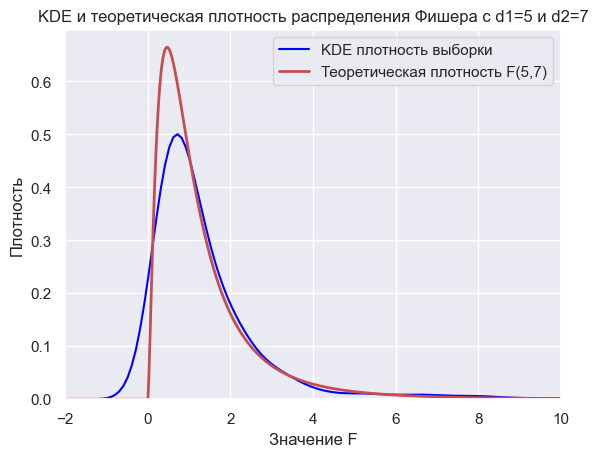

In [111]:
from scipy.stats import f

sns.kdeplot(F_samples, label="KDE плотность выборки", color='blue')

x = np.linspace(-3, 10, 5000) 
pdf = f.pdf(x, d1, d2)

plt.plot(x, pdf, 'r-', lw=2, label=f'Теоретическая плотность F({d1},{d2})')
plt.xlim(-2, 10)
plt.title("KDE и теоретическая плотность распределения Фишера с d1=5 и d2=7")
plt.xlabel("Значение F")
plt.ylabel("Плотность")
plt.legend()
plt.show()

Похожи ли графики? О чём это говорит?

Ответ: Графики похожи, особенно в конце распределения, это говорит о том, что сгенерированная выборка хорошо аппроксимирует распределение Фишера, такой результат может быть в том числе связан с большим размером выборки (N = 1000). Присутствуют отличия на участке пика (теоретическая плотность имеет более узкий и острый пик, в то время как KDE плотность имеет более сглаженный и широкий пик) и у нулевого значения (KDE имеет чуть более широкое основание, и плавно переходит к нулю, в то время как теоретическая плотность быстрее возрастает). Такие различия могут быть связаны со сглаживающим эффектом KDE.

Посмотрите на поведение KDE для разных размеров выборки. Рекомендуем брать не более трёх вариантов, чтобы не захламлять график, возьмите значения как больше, так и меньше изначального $N$ (особенно если ячейки долго работают). Как меняется вид оценки?

Для анализа я рассмотрела три выборки: N = 100, N = 2000 и N = 100000. Для визуального анализа я также оставила график теоретической плотности, чтобы сравнивавать графики KDE не только между собой, но и с графиком теоретической плотности. Для небольших выборок оценка плотности даёт значительные отклонения, однако при увеличении размера выборки KDE приближается к теоретической плотности. Значения в области 0 возрастают быстрее, пики становятся острее и ближе к пику теоретической плотности. При увеличении размера выборки KDE становится более точным и аппроксимирует теоретическую плотность лучше. Исходя из этого можно сделать вывод, что с увеличением размера выборки точность аппроксимации распределения Фишера увеличивается. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


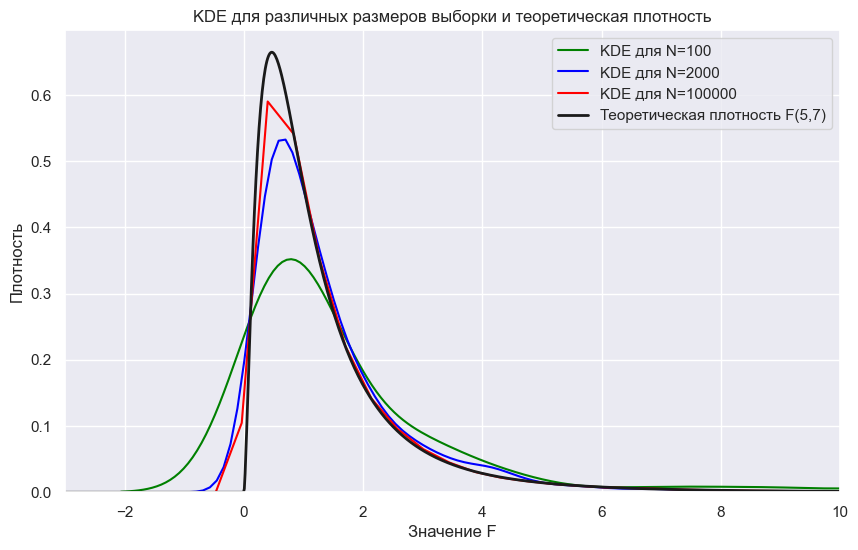

In [112]:
d1 = 5 
d2 = 7  
N_values = [100, 2000, 100000] 

colors = ['green', 'blue', 'red']

plt.figure(figsize=(10, 6))

for i, N in enumerate(N_values):
    X1 = np.random.normal(0, 1, (N, d1)) 
    X2 = np.random.normal(0, 1, (N, d2))  

    Y1 = np.sum(X1**2, axis=1)
    Y2 = np.sum(X2**2, axis=1) 

    F_samples = (Y1 / d1) / (Y2 / d2)

    sns.kdeplot(F_samples, label=f"KDE для N={N}", color=colors[i])

x = np.linspace(-3, 10, 1000) 
pdf = f.pdf(x, d1, d2) 

plt.plot(x, pdf, 'k-', lw=2, label=f'Теоретическая плотность F({d1},{d2})')

plt.xlim(-3, 10)

plt.title("KDE для различных размеров выборки и теоретическая плотность")
plt.xlabel("Значение F")
plt.ylabel("Плотность")
plt.legend()
plt.show()

Используя первоначальную выборку, посчитайте мат. ожидание и дисперсию распределения Фишера. Посчитайте теоретически мат. ожидание и дисперсию (формулы есть на Википедии). Сравните результаты.

In [113]:
mean_empirical = np.mean(F_samples)
var_empirical = np.var(F_samples)

if d2 > 2:
    mean_theoretical = d2 / (d2 - 2)
else:
    mean_theoretical = None  

if d2 > 4:
    var_theoretical = (2 * d2**2 * (d1 + d2 - 2)) / (d1 * (d2 - 2)**2 * (d2 - 4))
else:
    var_theoretical = None

print(f"Выборочное мат. ожидание: {mean_empirical:.4f}")
print(f"Теоретическое мат. ожидание: {mean_theoretical:.4f}")

print(f"Выборочная дисперсия: {var_empirical:.4f}")
print(f"Теоретическая дисперсия: {var_theoretical:.4f}")


Выборочное мат. ожидание: 1.3977
Теоретическое мат. ожидание: 1.4000
Выборочная дисперсия: 2.5300
Теоретическая дисперсия: 2.6133


Проверьте, что с ростом $N$ эмпирические мат. ожидание и дисперсия сходятся к теоретическим. Сделайте выводы.

На графиках ниже представлены траектории сходимости выборочного математического ожидания и дисперсии к теоретическим значениям. Как видно из графиков, с увеличением размера выборки точность аппроксимации увеличивается. Наглядно видна траектория сходимости величины $|\xi_n - \xi|$ в среднем. Красные линии представляют эмпирические кумулятивные средние выборок, которые постепенно приближаются к синей линии, отображающей теоретическое математическое ожидание на первом графике и теоретическую дисперсию на втором. Стандартное отклонение выборочных средних уменьшается с увеличением размера выборки, что также видно на графике. На небольших значениях N видны сильные колебания, однако с увеличением размера выборки графики становятся более стабильными и приближаются к теоретическим значениям. 
Таким образом, можно сделать вывод, что с увеличением размера выборки точность аппроксимации увеличивается. Это подтверждает закон больших чисел, который гласит, что выборочное среднее стремится к математическому ожиданию генеральной совокупности по мере увеличения размера выборки.

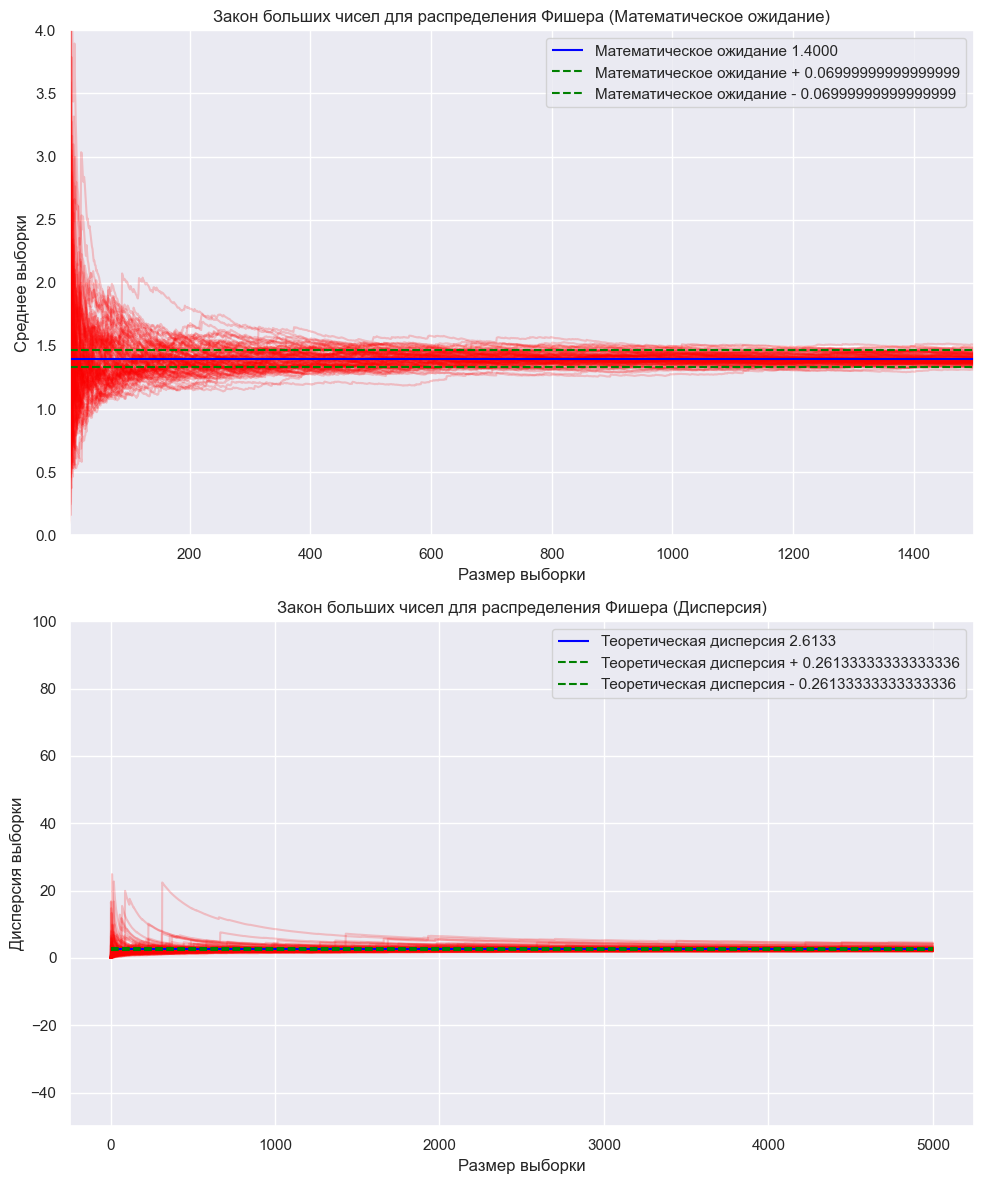

In [114]:
d1 = 5  
d2 = 7  
N = 5000  
mu = d2 / (d2 - 2)  
var_theoretical = (2 * d2**2 * (d1 + d2 - 2)) / (d1 * (d2 - 2)**2 * (d2 - 4)) 

eps_mean = 0.05 * mu
eps_var = 0.1 *var_theoretical

X1 = np.random.normal(0, 1, (100, d1, N))
X2 = np.random.normal(0, 1, (100, d2, N))

Y1 = np.sum(X1**2, axis=1)
Y2 = np.sum(X2**2, axis=1)

F_samples = (Y1 / d1) / (Y2 / d2)

P_mean = np.cumsum(F_samples, axis=1) / np.arange(1, N+1)
P_var = np.cumsum((F_samples - P_mean)**2, axis=1) / np.arange(1, N+1)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].set_title('Закон больших чисел для распределения Фишера (Математическое ожидание)')
axs[0].set_xlabel('Размер выборки')
axs[0].set_ylabel('Среднее выборки')
axs[0].plot(np.arange(1, N + 1), P_mean.T, color='red', alpha=0.2)
axs[0].hlines(mu, xmin=1, xmax=N, colors='blue', label=f'Математическое ожидание {mu:.4f}')
axs[0].hlines(mu + eps_mean, xmin=1, xmax=N, colors='green', linestyles='--', label=f'Математическое ожидание + {eps_mean}')
axs[0].hlines(mu - eps_mean, xmin=1, xmax=N, colors='green', linestyles='--', label=f'Математическое ожидание - {eps_mean}')
axs[0].legend()

axs[0].set_xlim(1, 1500)
axs[0].set_ylim(0, 4)

axs[1].set_title('Закон больших чисел для распределения Фишера (Дисперсия)')
axs[1].set_xlabel('Размер выборки')
axs[1].set_ylabel('Дисперсия выборки')
axs[1].plot(np.arange(1, N + 1), P_var.T, color='red', alpha=0.2)
axs[1].hlines(var_theoretical, xmin=1, xmax=N, colors='blue', label=f'Теоретическая дисперсия {var_theoretical:.4f}')
axs[1].hlines(var_theoretical + eps_var, xmin=1, xmax=N, colors='green', linestyles='--', label=f'Теоретическая дисперсия + {eps_var}')
axs[1].hlines(var_theoretical - eps_var, xmin=1, xmax=N, colors='green', linestyles='--', label=f'Теоретическая дисперсия - {eps_var}')
axs[1].legend()

axs[1].set_ylim(-50, 100)

plt.tight_layout()
plt.show()

Вспомните, как работает QQ-plot.

Прочитайте документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

QQ-plot является хорошим прикладным инструментом проверки распределения на принадлежность семейству. Проверьте, что Ваша выборка действительно является выборкой из распределения Фишера, построив QQ-plot

Ниже представлен QQ plot, который отображает квантили выборки из распределения Фишера и теоретические квантили. На графике красным цветом отображена прямая y=x, синими точками отмечены квантили эмпирического распределения выборки, сравниваемые с квантилями теоретического распределения Фишера. Для малых и средних значений квантилей (примерно до 15) точки лежат близко к красной линии, однако после 15 некоторые точки начинают отклоняться от прямой. Такие отклонения указывают на то, что хвосты выборки толще, чем у теоретического распределения Фишера. Это может означать, что в выборке присутствует больше значений с большими отклонениями, чем ожидается для стандартного распределения Фишера. То есть вероятность экстремальных значений в выборке выше, чем предсказывает теоретическое распределение. Но в целом, основываясь на том, что размер выборки достаточно большой (10 000), а точек, которые отклоняются от прямой, не много, можно считать, что выборка действительно является выборкой из распределения Фишера

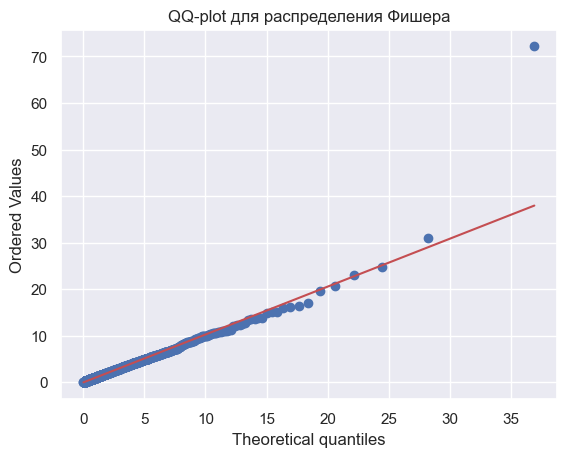

In [115]:
import scipy.stats as stats

d1 = 5 
d2 = 7  
N = 10000

X1 = np.random.normal(0, 1, (N, d1))
X2 = np.random.normal(0, 1, (N, d2))

Y1 = np.sum(X1**2, axis=1)
Y2 = np.sum(X2**2, axis=1)  

F_samples = (Y1 / d1) / (Y2 / d2) 

stats.probplot(F_samples, dist="f", sparams=(d1, d2), plot=plt)
plt.title("QQ-plot для распределения Фишера")
plt.show()


Какие выводы можно сделать, если точки в хвостах QQ-plot находятся выше/ниже своей прямой, как на картинке ниже? А если оба "хвоста" находятся с одной стороны прямой?

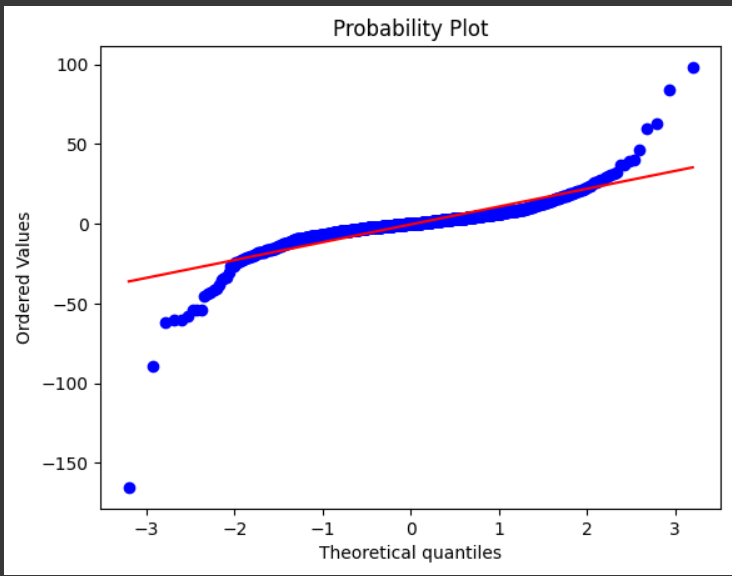

Ответ: на графике точки в правом хвосте находятся выше прямой, а в левом хвосте ниже прямой. Если точки в правом хвосте находятся выше диагональной прямой, это означает, что реальные данные имеют более длинный правый хвост, чем теоретическое распределение, это может произойти из-за положительных экстремальных значений. Когда точки в левом хвосте находятся ниже диагональной прямой, это указывает на то, что выборка имеет более длинный левый хвост, чем теоретическое распределение.
Это означает, что в данных больше экстремальных отрицательных значений, чем предсказывает теоретическая модель.
Если оба хвоста находятся с одной стороны от прямой, это означает, что данные имеют более длинные хвосты, чем теоретическое распределение.

### Задача 2

В данной задаче Вам предстоит проверить истинность дельта-метода на практике, используя KDE.

Формулировка теоремы о дельта-методе представлена в методичке курса, глава 1, теорема 1.4.

Нас же интересует задача 3 из списка задач для самостоятельного решения.

####Условие.
Дана выборка $X_i$ из $N(0, \sigma^2)$,

$Y = \frac{1}{n}\sum_1^n |X_i|$,

$Z = \frac{1}{n}\sum_1^n X_i^2$.

$T = \sqrt{\frac{2}{\pi}}\frac{Z}{Y}$. Куда сходится $P = \sqrt{n}(T - \sigma)$ по распределению?

Скорее всего, Вы решали эту задачу на семинаре. Или решал Ваш сосед по комнате. В любом случае, известно, что предел --- это нормальное распределение с нулевым средним. Посчитайте дисперсию предельного распределения и напишите ответ ниже.

Ответ: $$(\frac{\pi}{2} - 1) \sigma^2$$

Теперь попробуем увидеть, как ведёт себя величина $T$ и проверить, что она сходится по распределению.

Наш план:

1) Построить выборку независимых величин $P$.

2) Построить хорошее приближение плотности $P$ для каждого $n$.

3) Изучить, как ведёт себя плотность с ростом $n$.

4) Сделать вывод о наличии сходимости по распределению к величине с заданной плотностью.

Рекомендуем Вам изначально зафиксировать несколько вариантов $\sigma$ и проводить параллельное решение каждого пункта задачи для каждого значения.

1) Необходимо построить выборку из величин $P$.

Каждая величина $P$ не может быть сгенерирована напрямую, так что необходимо сгенерировать выборку величин $X_i$ --- по $n$ штук для каждого $P$. Так мы приходим к понятию "выборка выборок".

Сгенерируйте N выборок $X_1, \dots, X_N$ из нормального распределения $N(0, \sigma^2)$ для $N = 10^4$. Если у Вас долго считаются формулы, можете понизить $N$ до 100. Не забывайте про векторные вычисление numpy!

In [116]:
N = 10000  
sigma_1 = 1
sigma_2 = 3
sigma_3 = 15

X_1 = np.random.normal(0, sigma_1, (N, N))
X_2 = np.random.normal(0, sigma_2, (N, N))
X_3 = np.random.normal(0, sigma_3, (N, N))


Для всех $N$ выборок посчитайте $P$.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [117]:
def generate_P(X, sigma, N):
    Y = np.mean(np.abs(X), axis=1)
    Z = np.mean(X**2, axis=1)
    T = np.sqrt(2 / np.pi) * Z / Y
    P = (np.sqrt(N)) * (T - sigma)
    return P

P_1 = generate_P(X_1, sigma_1, N)
P_2 = generate_P(X_2, sigma_2, N)
P_3 = generate_P(X_3, sigma_3, N)

2) Построить приближение плотности величин $P$.

Вспомните, как работает KDE для вычисления плотности по выборке.
Прочитайте документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

Постройте график плотности выборки величин $P$. Не забудьте про оси графика!

In [15]:
import pandas as pd

In [48]:
from scipy.stats import gaussian_kde

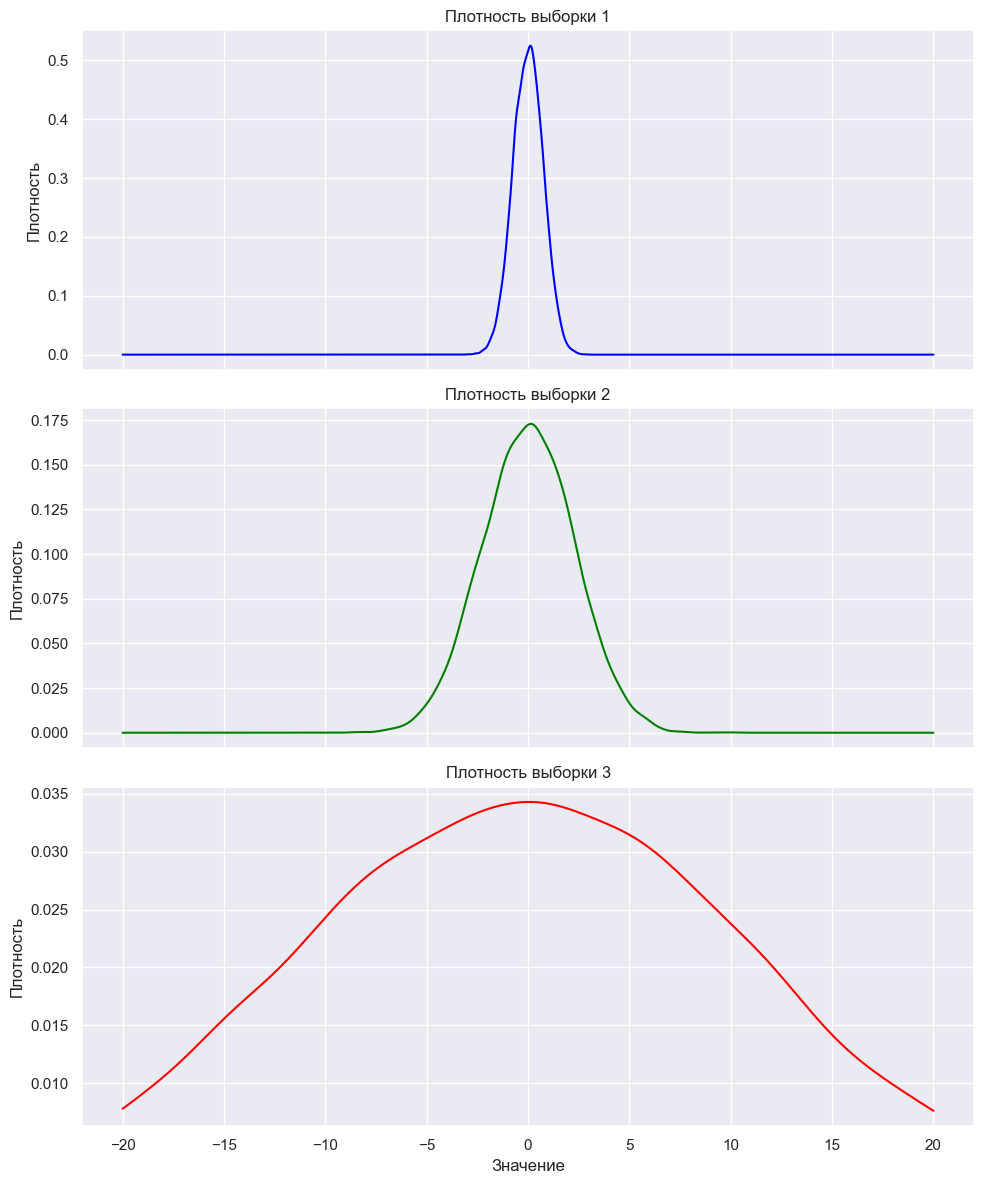

In [118]:
kde_1 = gaussian_kde(P_1)
kde_2 = gaussian_kde(P_2)
kde_3 = gaussian_kde(P_3)

x_values = np.linspace(-20, 20, 1000)

density_1 = kde_1(x_values)
density_2 = kde_2(x_values)
density_3 = kde_3(x_values)

fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

axes[0].plot(x_values, density_1, color='blue')
axes[0].set_title('Плотность выборки 1')
axes[0].set_ylabel('Плотность')
axes[0].grid(True)

axes[1].plot(x_values, density_2, color='green')
axes[1].set_title('Плотность выборки 2')
axes[1].set_ylabel('Плотность')
axes[1].grid(True)

axes[2].plot(x_values, density_3, color='red')
axes[2].set_title('Плотность выборки 3')
axes[2].set_xlabel('Значение')
axes[2].set_ylabel('Плотность')
axes[2].grid(True)

plt.tight_layout()
plt.show()


3) Изучить поведение плотности с ростом $n$.

Как мы знаем из курса теории вероятностей, сходимость по распределению эквивалентна поточечной сходимости функций распределения. Теория из мат. анализа гарантирует сходимость функций при наличии сходимости их производных при выполнении некоторых других регулярных условий (см. курс мат. анализа). На практике выводы о наличии сходимости по распределению делаются при помощи демонстрации сходимости плотностей.

На одном графике изобразите жирной линией одного цвета плотность предельного распределения, посчитанного в пункте 1. Не считайте плотность нормального распределения руками, вместо этого используйте scipy.

В тех же осях изобразите полупрозрачными линиями плотности величин P для N = 1000, 2000, ..., 10000.

Продемонстрирую графики сходимостей для каждого значения $\sigma$.

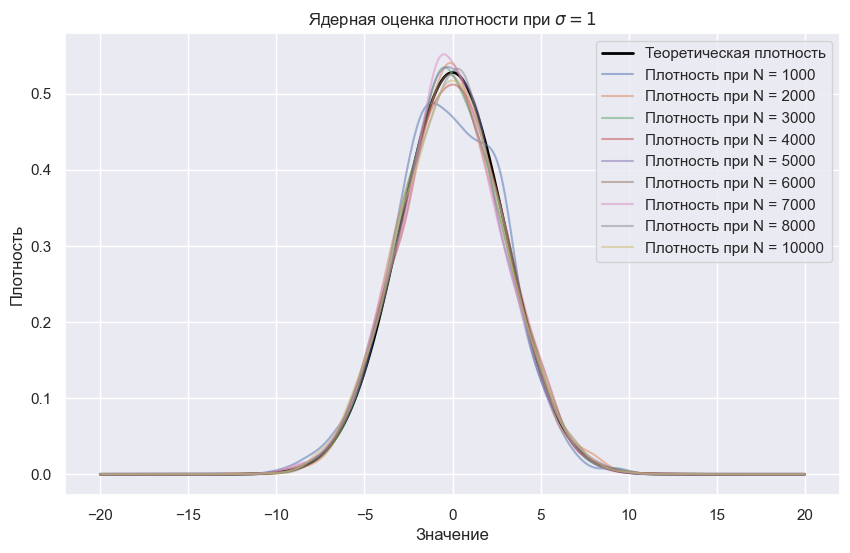

In [119]:
N_values = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 10000]
x_values_1 = np.linspace(-5, 5, 1000)

theoretical_density_1 = stats.norm(loc=0, scale=np.sqrt((np.pi / 2 - 1) * sigma_1**2)).pdf(x_values_1)

plt.figure(figsize=(10, 6))
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Ядерная оценка плотности при $\sigma = 1$')

plt.plot(x_values, theoretical_density_1, label='Теоретическая плотность', color='black', linewidth=2)
plt.legend()

for N in N_values:
    P = generate_P(np.random.normal(0, sigma_1, (N, N)), sigma_1, N)
    kde = gaussian_kde(P)
    density = kde(x_values_1)
    plt.plot(x_values, density, label = 'Плотность при N = {}'.format(N), alpha=0.5)
    plt.legend()
    
plt.show()

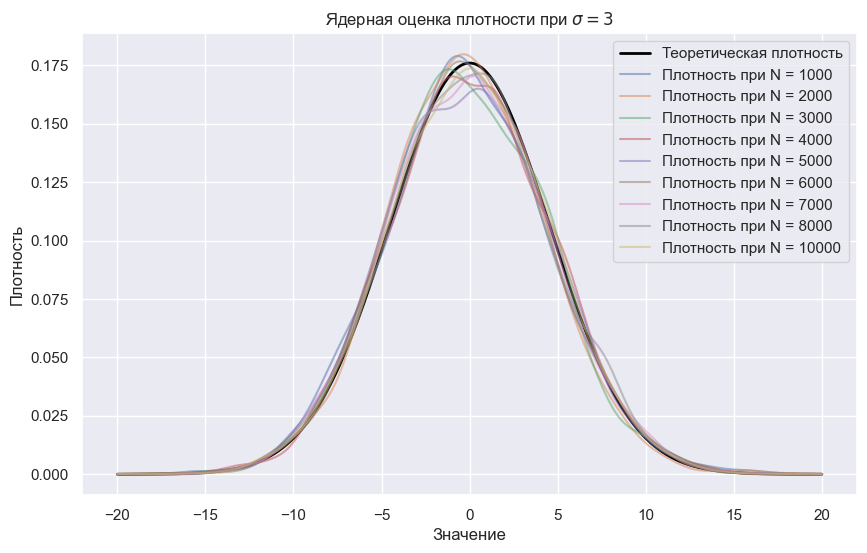

In [120]:
N_values = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 10000]
x_values_2 = np.linspace(-10, 10, 1000)

theoretical_density_2 = stats.norm(loc=0, scale=np.sqrt((np.pi / 2 - 1) * sigma_2**2)).pdf(x_values_2)

plt.figure(figsize=(10, 6))
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Ядерная оценка плотности при $\sigma = 3$')

plt.plot(x_values, theoretical_density_2, label='Теоретическая плотность', color='black', linewidth=2)
plt.legend()

for N in N_values:
    P = generate_P(np.random.normal(0, sigma_2, (N, N)), sigma_2, N)
    kde = gaussian_kde(P)
    density = kde(x_values_2)
    plt.plot(x_values, density, label = 'Плотность при N = {}'.format(N), alpha=0.5)
    plt.legend()
    
plt.show()



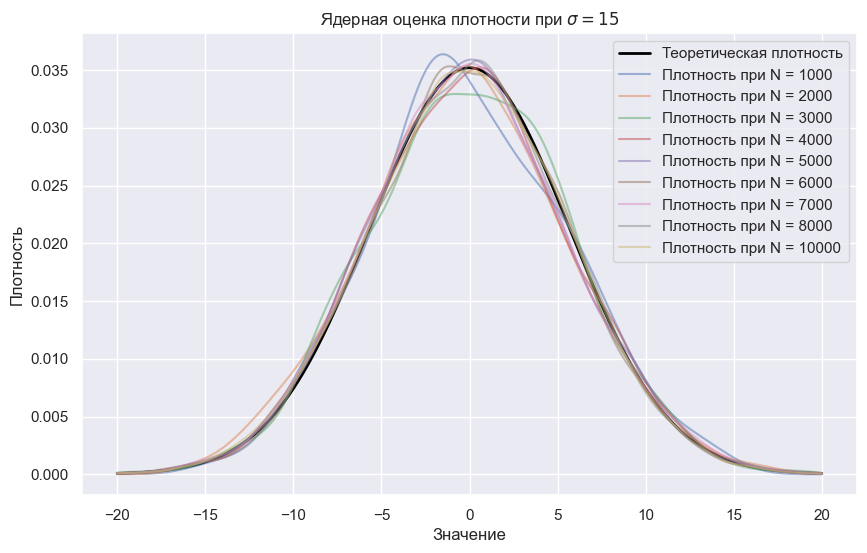

In [122]:
N_values = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 10000]
x_values_3 = np.linspace(-40, 40, 1000)

theoretical_density_3 = stats.norm(loc=0, scale=np.sqrt((np.pi / 2 - 1) * sigma_3**2)).pdf(x_values_3)

plt.figure(figsize=(10, 6))
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Ядерная оценка плотности при $\sigma = 15$')

plt.plot(x_values, theoretical_density_3, label='Теоретическая плотность', color='black', linewidth=2)
plt.legend()

for N in N_values:
    P = generate_P(np.random.normal(0, sigma_3, (N, N)), sigma_3, N)
    kde = gaussian_kde(P)
    density = kde(x_values_3)
    plt.plot(x_values, density, label = 'Плотность при N = {}'.format(N), alpha=0.5)
    plt.legend()
    
plt.show()



Сделайте выводы о том, видна ли сходимость? Как Вы это поняли?

Вывод: По графикам видно, что плотности выборок приближаются к теоретической плотности при увеличении размера выборки. Также можно отметить, что при меньших значениях $\sigma$ плотности выборок приближаются к теоретической плотности быстрее, чем при больших значениях $\sigma$.

Также иногда доказывают равномерную сходимость плотностей по определению.

Выберите достаточно малое $\varepsilon$ и заштрихуйте на графике область точек, где находятся графики функций $g$, для которых верно $|g(x) - f(x)| \leq \varepsilon$ для любых $x$, где $f$ --- предельная плотность.

Полупрозрачными линиями нарисуйте графики плотностей величины $P$ для достаточно больших $N$.

Аналогично, продемонстрирую графики для каждого значения $\sigma$, выберу для каждого случая свое значение $\varepsilon$.

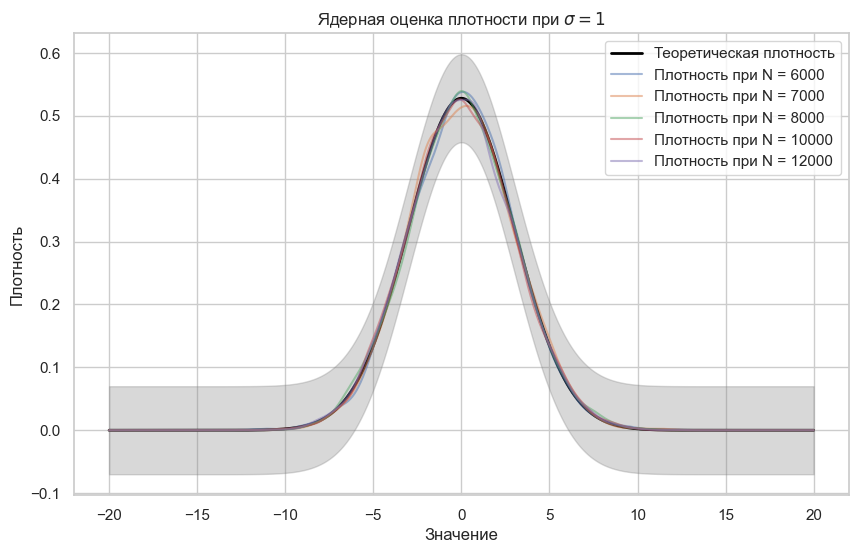

In [100]:
N_values = [6000, 7000, 8000, 10000, 12000]
eps_1 = 0.07
x_values_1 = np.linspace(-5, 5, 1000)

theoretical_density_1 = stats.norm(loc=0, scale=np.sqrt((np.pi / 2 - 1) * sigma_1**2)).pdf(x_values_1)

plt.figure(figsize=(10, 6))
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Ядерная оценка плотности при $\sigma = 1$')

plt.plot(x_values, theoretical_density_1, label='Теоретическая плотность', color='black', linewidth=2)
plt.legend()

for N in N_values:
    P = generate_P(np.random.normal(0, sigma_1, (N, N)), sigma_1, N)
    kde = gaussian_kde(P)
    density = kde(x_values_1)
    plt.plot(x_values, density, label = 'Плотность при N = {}'.format(N), alpha=0.5)
    plt.legend()

plt.fill_between(x_values, theoretical_density_1 - eps_1, theoretical_density_1 + eps_1, color='gray', alpha=0.3) 
plt.show()



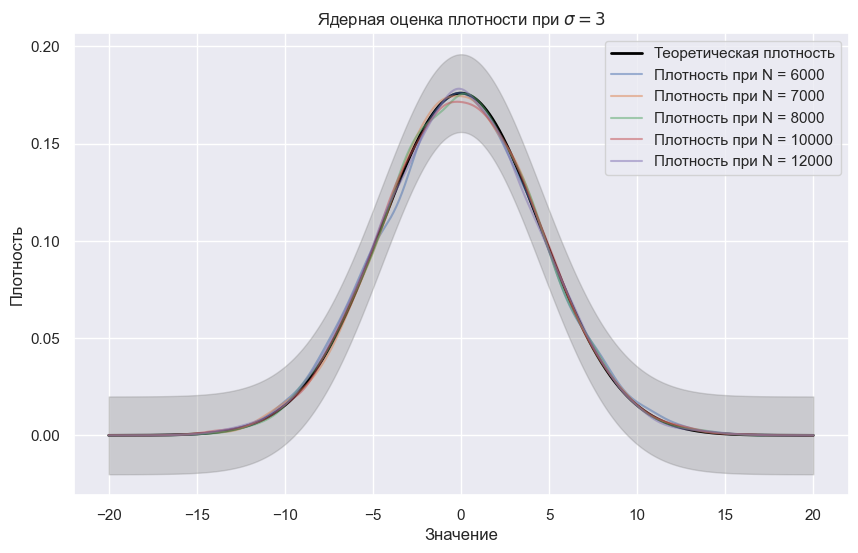

In [124]:
N_values = [6000, 7000, 8000, 10000, 12000]
eps_2 = 0.02
x_values_2 = np.linspace(-10, 10, 1000)

theoretical_density_2 = stats.norm(loc=0, scale=np.sqrt((np.pi / 2 - 1) * sigma_2**2)).pdf(x_values_2)

plt.figure(figsize=(10, 6))
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Ядерная оценка плотности при $\sigma = 3$')

plt.plot(x_values, theoretical_density_2, label='Теоретическая плотность', color='black', linewidth=2)
plt.legend()

for N in N_values:
    P = generate_P(np.random.normal(0, sigma_2, (N, N)), sigma_2, N)
    kde = gaussian_kde(P)
    density = kde(x_values_2)
    plt.plot(x_values, density, label = 'Плотность при N = {}'.format(N), alpha=0.5)
    plt.legend()

plt.fill_between(x_values, theoretical_density_2 - eps_2, theoretical_density_2 + eps_2, color='gray', alpha=0.3) 
plt.show()



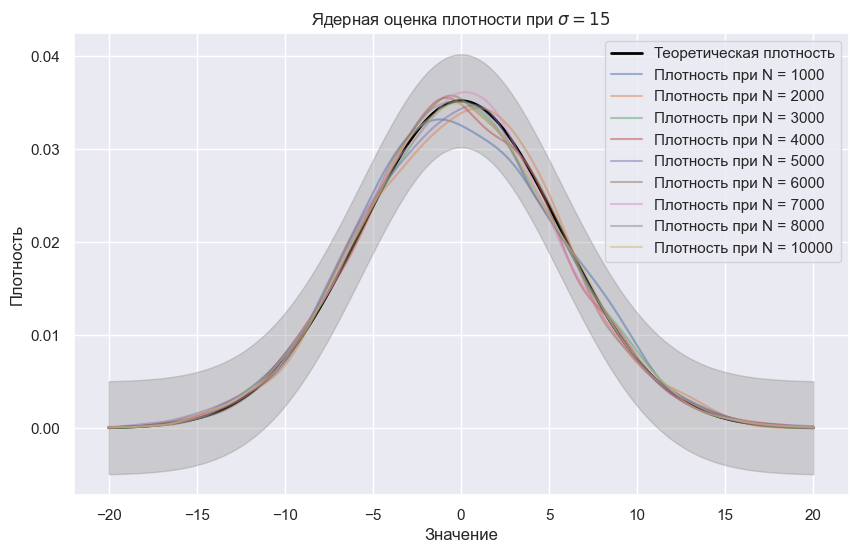

In [125]:
N_values = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 10000]
eps_3 = 0.005
x_values_3 = np.linspace(-40, 40, 1000)

theoretical_density_3 = stats.norm(loc=0, scale=np.sqrt((np.pi / 2 - 1) * sigma_3**2)).pdf(x_values_3)

plt.figure(figsize=(10, 6))
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Ядерная оценка плотности при $\sigma = 15$')

plt.plot(x_values, theoretical_density_3, label='Теоретическая плотность', color='black', linewidth=2)
plt.legend()

for N in N_values:
    P = generate_P(np.random.normal(0, sigma_3, (N, N)), sigma_3, N)
    kde = gaussian_kde(P)
    density = kde(x_values_3)
    plt.plot(x_values, density, label = 'Плотность при N = {}'.format(N), alpha=0.5)
    plt.legend()

plt.fill_between(x_values, theoretical_density_3 - eps_3, theoretical_density_3 + eps_3, color='gray', alpha=0.3)
plt.show()



Верно ли, что для всех больших $N$ графики лежат в окрестности предела? Проверьте это условие численно для какой-нибудь сетки точек.
Доделайте доказательство сходимости по распределению.

Вывод: по графикам видно, что плотности выборок лежат в окрестности предела для всех больших $N$, то есть выполняется неравенство $|g(x) - f(x)| \leq \varepsilon$. Проверю это условие численно для каждого значения $\sigma$.

In [126]:
for N in N_values:
    P = generate_P(np.random.normal(0, sigma_1, (N, N)), sigma_1, N)
    kde = gaussian_kde(P)
    density = kde(x_values_1)
    if np.all(np.abs(theoretical_density_1 - density) <= eps_1):
        print(f'Для N = {N} графики лежат в окрестности предела')
    else:
        print(f'Для N = {N} графики не лежат в окрестности предела')

Для N = 1000 графики лежат в окрестности предела
Для N = 2000 графики лежат в окрестности предела
Для N = 3000 графики лежат в окрестности предела
Для N = 4000 графики лежат в окрестности предела
Для N = 5000 графики лежат в окрестности предела
Для N = 6000 графики лежат в окрестности предела
Для N = 7000 графики лежат в окрестности предела
Для N = 8000 графики лежат в окрестности предела
Для N = 10000 графики лежат в окрестности предела


In [127]:
for N in N_values:
    P = generate_P(np.random.normal(0, sigma_2, (N, N)), sigma_2, N)
    kde = gaussian_kde(P)
    density = kde(x_values_2)
    if np.all(np.abs(theoretical_density_2 - density) <= eps_2):
        print(f'Для N = {N} графики лежат в окрестности предела')
    else:
        print(f'Для N = {N} графики не лежат в окрестности предела')

Для N = 1000 графики лежат в окрестности предела
Для N = 2000 графики лежат в окрестности предела
Для N = 3000 графики лежат в окрестности предела
Для N = 4000 графики лежат в окрестности предела
Для N = 5000 графики лежат в окрестности предела
Для N = 6000 графики лежат в окрестности предела
Для N = 7000 графики лежат в окрестности предела
Для N = 8000 графики лежат в окрестности предела
Для N = 10000 графики лежат в окрестности предела


In [128]:
for N in N_values:
    P = generate_P(np.random.normal(0, sigma_3, (N, N)), sigma_3, N)
    kde = gaussian_kde(P)
    density = kde(x_values_3)
    if np.all(np.abs(theoretical_density_3 - density) <= eps_3):
        print(f'Для N = {N} графики лежат в окрестности предела')
    else:
        print(f'Для N = {N} графики не лежат в окрестности предела')

Для N = 1000 графики лежат в окрестности предела
Для N = 2000 графики лежат в окрестности предела
Для N = 3000 графики лежат в окрестности предела
Для N = 4000 графики лежат в окрестности предела
Для N = 5000 графики лежат в окрестности предела
Для N = 6000 графики лежат в окрестности предела
Для N = 7000 графики лежат в окрестности предела
Для N = 8000 графики лежат в окрестности предела
Для N = 10000 графики лежат в окрестности предела


Ответ: Для всех больших $N$ графики лежат в окрестности предела, что и было предположено выше графическим методом. При уменьшении $\varepsilon$ условие нахождения графика в окрестноти может уже не выполняться. Однако при подобранных значениях $\varepsilon$ графики лежат в окрестности предела.

Сделайте вывод о возможности применения KDE для визуализации поведения распределений.

Вывод:

KDE позволяет визуализировать поведение распределений и делать выводы о сходимости по распределению. С помощью KDE можно визуально оценивать сходимости плотностей выборок к предельной плотности и проверять условие $|g(x) - f(x)| \leq \varepsilon$ для всех больших $N$. Оценка плотности при помощи гауссовсого ядра обеспечивает непрерывность графика, что может быть удобнее для анализа, чем обычные гистограммы. KDE демонтрирует поведение плотности при увеличении выборки, однако при высокой сглаженности или низких значениях выборки график распределения может потерять важные локальные особенности..  

### Задача 3

В этой задаче мы будем учиться проверять сходимость по мере случайных величин к константе (позже это свойство назовут состоятельностью).

Будем работать с распределением $U[0, \theta]$ --- равномерным распределением на отрезке и оценкой $\hat{\theta} = \frac{n+1}{n}X_{(n)}$, где $X_{(i)}$ --- $i$-тый член вариационного ряда выборки ($i$-тое по порядку число, если выборку отсортировать), то есть оценивать параметр мы будем максимумом.

Мы будем численно доказывать, что это состоятельная оценка (т.е. она сходится по мере к значению параметра).

Сгенерируйте по одной оценке $\theta$ для $N$ от 1 до 1000.

Отобразите на графике в осях $n, \theta$ поведение этой оценки. Сходится ли она? Как быстро?

По одной траектории, конечно, вывод о сходимости по вероятности делать нельзя.

Почему?

Ответ:

Для сходимости по мере нужно изучить поведение многих траекторий. По определению, $P(|\hat{\theta}_n - \theta| > \varepsilon)$ сходится к нулю. То есть для любого наперёд заданного эпсилон с ростом $n$ всё больше и больше траекторий должны попадать в эпсилон-окрестность истинного значения параметра.

Проверим.

На одном графике изобразите:

1) Горизонтальные прямые --- значение параметра и его эпсилон-окрестности (заштрихуйте её и выделите границы)

2) Сгенерируйте 1000 траекторий поведения оценки и полупрозрачными линиями нарисуйте их.

Численно проверьте, какая доля траекторий не попадает в окрестность для каждого $N$. Сходится ли это число к нулю?

Сделайте вывод о том, наблюдается ли сходимость по мере.

Вывод:

Повторите эксперимент для 2-3 разных $\theta$ и сделайте выводы.

Вывод:

**Бонусный вопрос:** (баллами не оценивается, но даёт пищу для ума).

На практике статистики не отличают состоятельность от сильной состоятельности и проверяют оба свойства одинаково. Годится ли наш метод практической проверки для проверки сильной состоятельности? Как можно было бы проверить её качественнее?

Ответ: